## Outline
- Dummy variables
- F-test
- Adjusted $R^2$
- Interaction terms
- Stepwise regression

**Question 1**

A company that makes carseats would like to construct a model to predict sales. 

The data file https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv contains 400 observations on the following 11 variables.

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

<br>

1. Load in and visualize the data with the appropriate plots. The following command makes a scatter matrix plot with a lot of data easier to read:
   ```python
   pd.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);
   ```
   
   Use additional plots as you see appropriate. 
   
   Comment on the trends you have observed in the data.
   
   <br>

2. We can visualize categorical variables with bar plots. Use the command `carseat_data.plot(kind='bar')` to plot the categorical variables. The command is configurable by additional arguments, read the docs [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#bar-plots). Below is an example you can reference:

   ```python
   carseat_data['Urban'].value_counts().plot(kind='bar', ax=axs[0][0], title='Urban')
   ```

   <br>

3. To fit a multiple regression model on a categorical variable, the categorical variable must be binarized into columns which consists of either `0` or `1`.

   Use the command `binarized = pd.get_dummies(carseat_data)` to binarized all the categorical variables in the dataframe.
   
   To fit a multiple regression model, one of the dummy variables created from each categorical variable has to be removed. 
   
   For each categorical variable, pick one dummy column to remove. Use the command `binarized.drop(column_name_list, axis=1)`
   
   <br>

4. Build a multiple regression model to predict `sales` with all the variables provided. Remember to add an intercept column to the dataframe before fitting the regression model. Print the summary of the fitted model.

   <br>

5. Interpret the result given by the F-statistic and its p-value. 

   <br>
   
6. Interpret the coefficients of the model.
  
   <br>
   
7. Perform a backward stepwise regression on the model by removing statistically insignificant coefficients one at a time (starting from the most insignificant variable). Re-run the model after each variable elimination; iterate until all variables are statistically significant to obtain the final model. 

   Is it meaningful to compare the $R^2$ of the original model with the final model. Examine the adjusted $R^2$ and explain why it is more appropriate to use it here. 

   How is the fit of the final model?

## 1)

>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
carseats_df =  pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv')

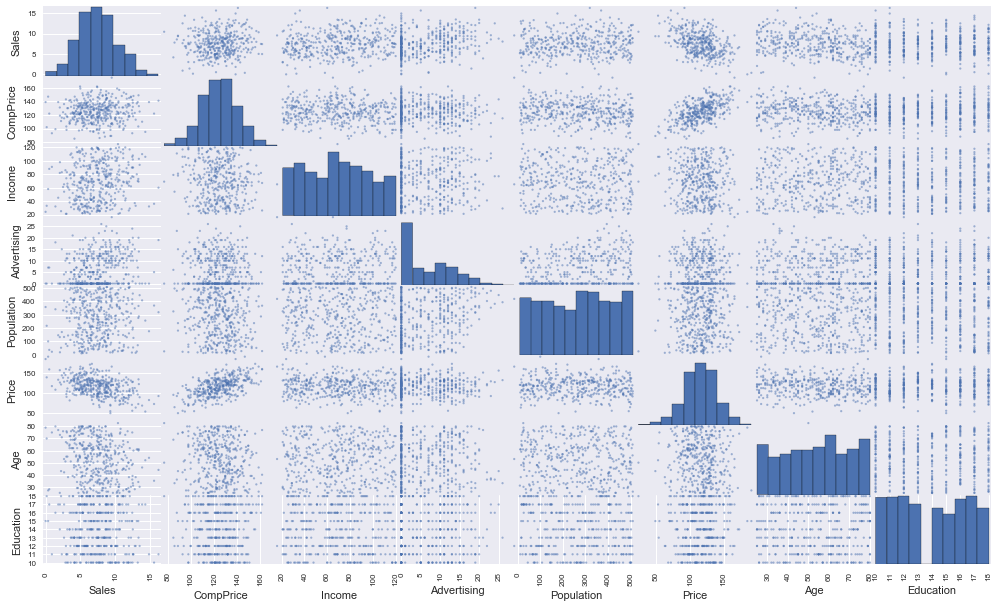

In [8]:
pd.scatter_matrix(carseats_df, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [15]:
carseats_df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [60]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null float64
Income         400 non-null float64
Advertising    400 non-null float64
Population     400 non-null float64
Price          400 non-null float64
ShelveLoc      400 non-null object
Age            400 non-null float64
Education      400 non-null float64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(8), object(3)
memory usage: 34.5+ KB


In [43]:
carseats_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff284e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1210c4550>]], dtype=object)

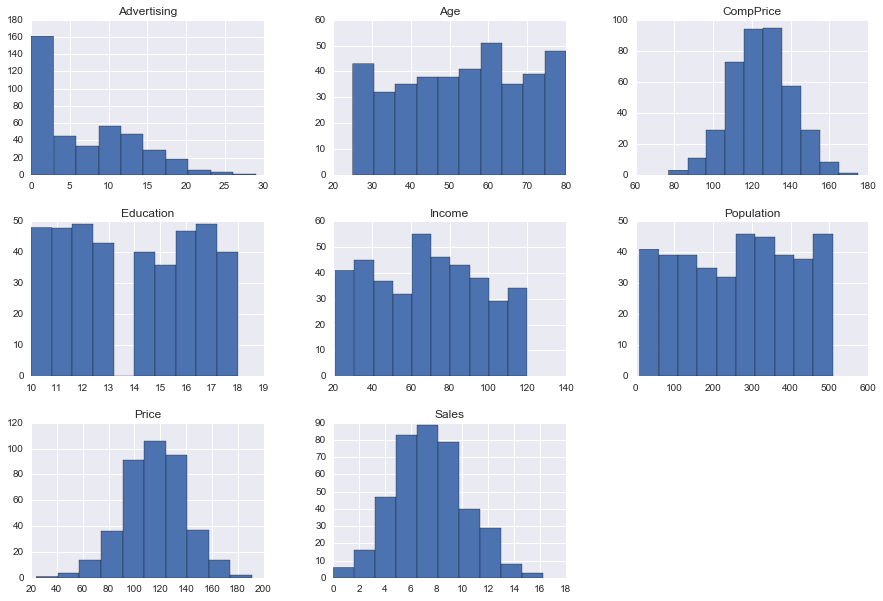

In [17]:
carseats_df.hist(figsize=(15,10))

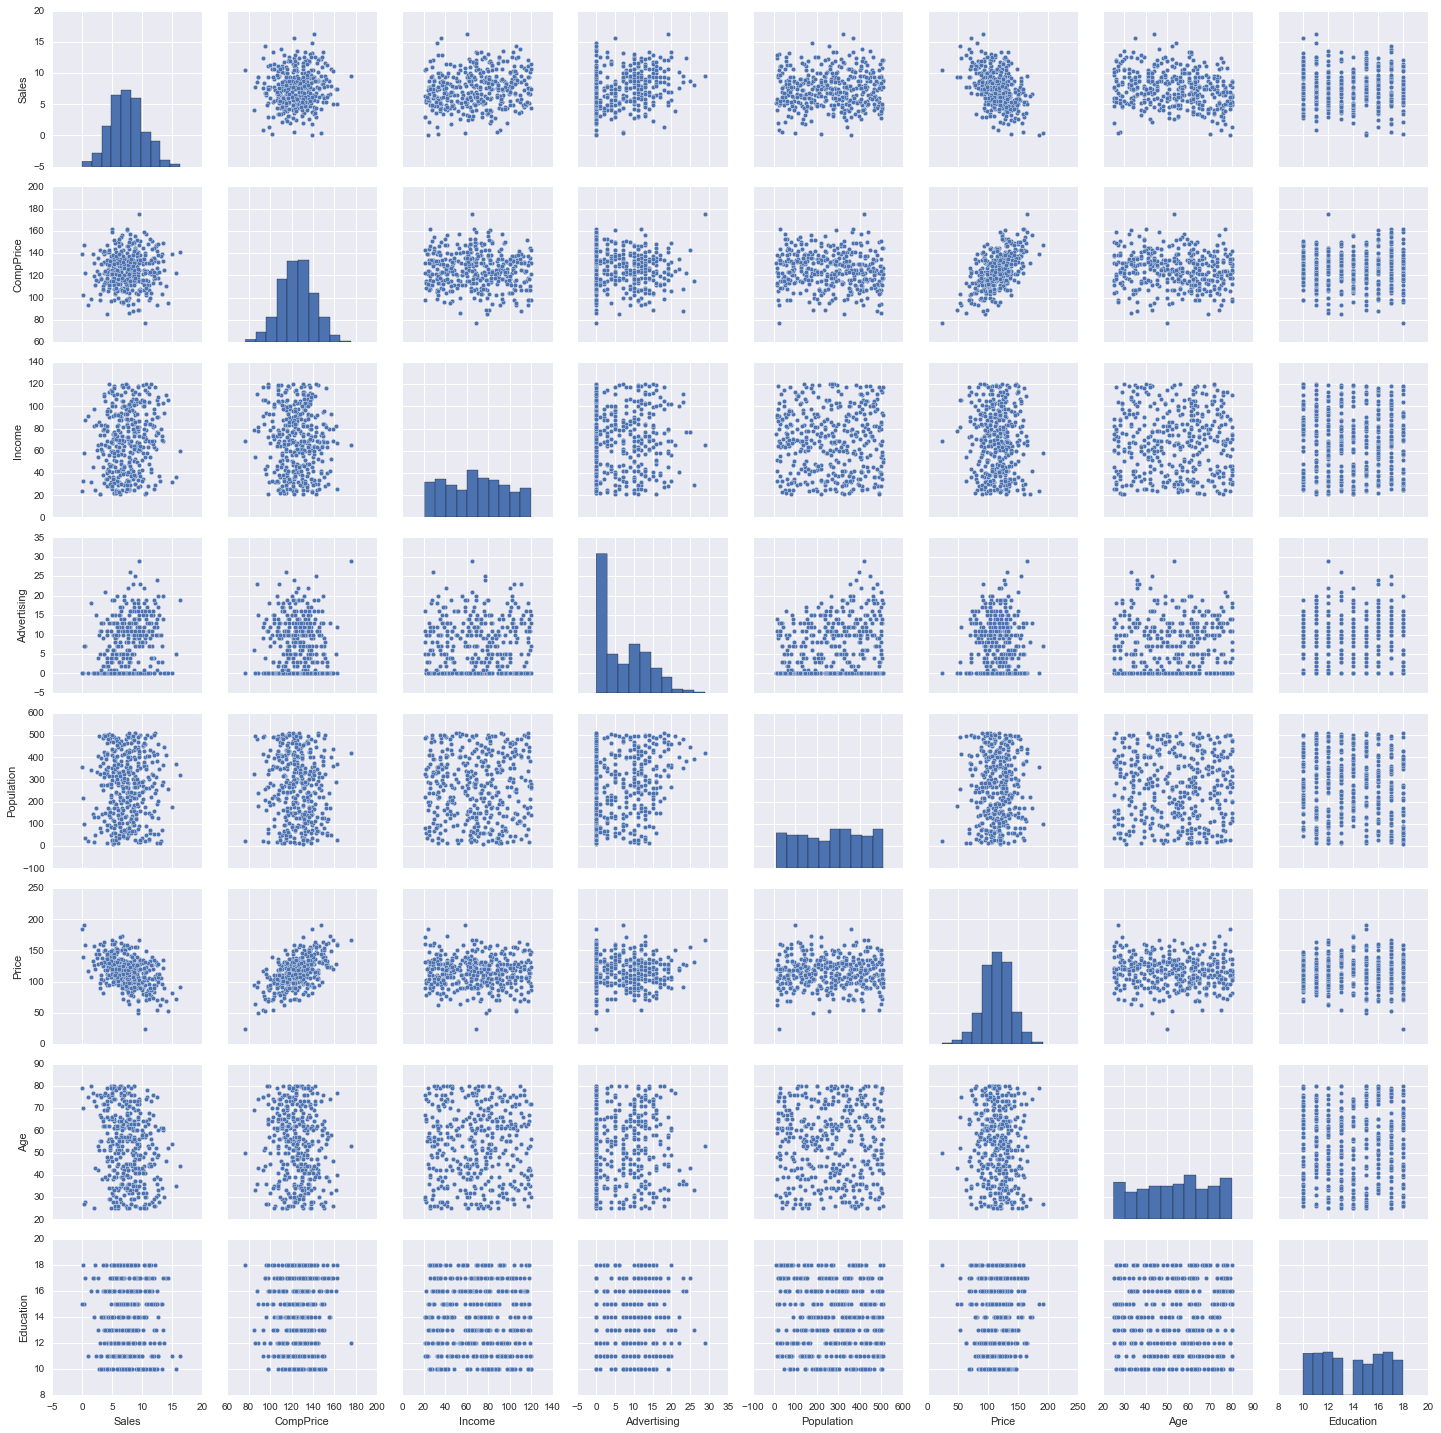

In [24]:
sns.pairplot(carseats_df)

> Reviewing the data above, we can see that age are sales have a relatively weak positive correlation at -.23, CompPrice and Price have a moderately strong positive correlation at .58, Price and sales have a moderate negative correaltion at -.44. In addition, it looks like income and advertising might have a bimodal distribution. 

# 2)

In [39]:
carseats_df.dtypes

Sales          float64
CompPrice      float64
Income         float64
Advertising    float64
Population     float64
Price          float64
ShelveLoc       object
Age            float64
Education      float64
Urban           object
US              object
dtype: object

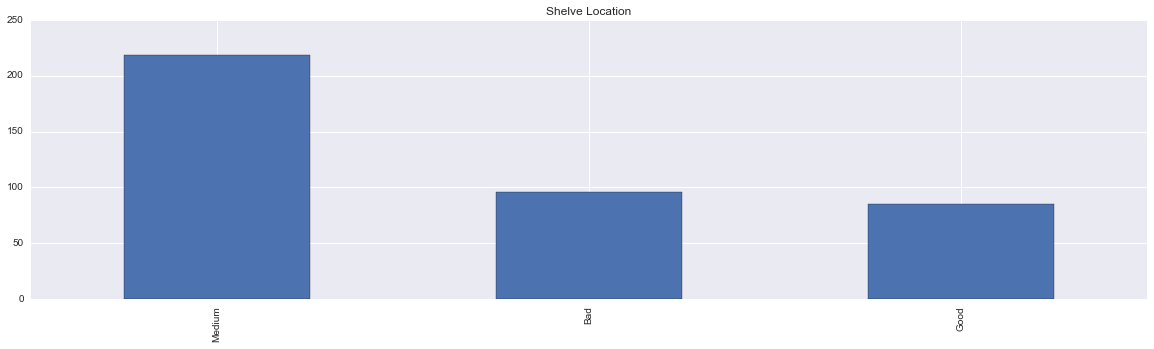

In [41]:
#carseat_data['Urban'].value_counts().plot(kind='bar', ax=axs[0][0], title='Urban')

carseats_df.ShelveLoc.value_counts().plot(kind='bar',  title='Shelve Location',figsize=(20,5));

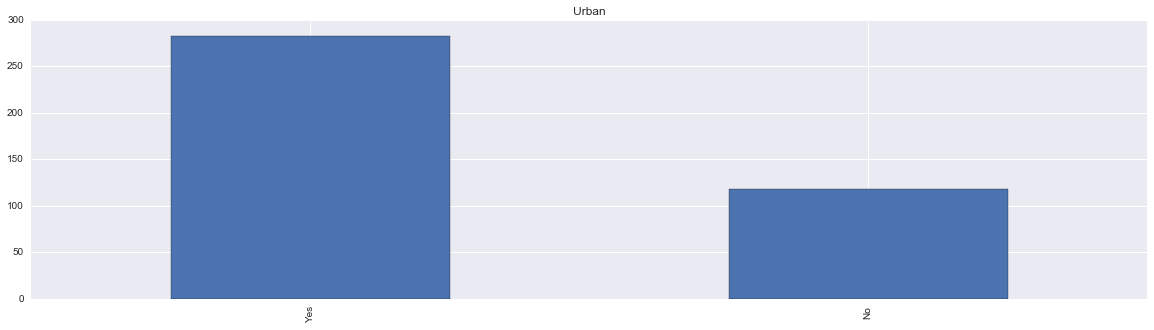

In [42]:
carseats_df.Urban.value_counts().plot(kind='bar',  title='Urban',figsize=(20,5));

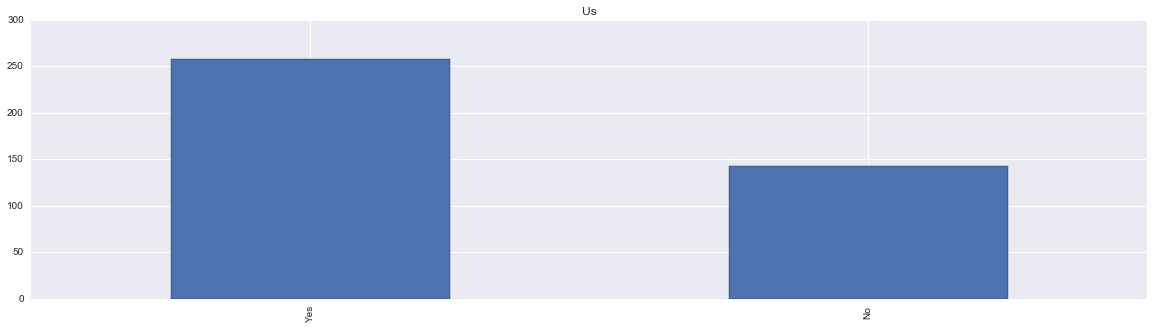

In [45]:
carseats_df.US.value_counts().plot(kind='bar',  title='Us',figsize=(20,5));

# 3)

In [56]:
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42.0,17.0,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,Good,65.0,10.0,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59.0,12.0,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55.0,14.0,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38.0,13.0,Yes,No


In [49]:
binned_carseats_df = pd.get_dummies(carseats_df)
binned_carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [53]:
binned_carseats_df=binned_carseats_df.drop(['ShelveLoc_Bad','Urban_No','US_No'], axis=1)


ValueError: labels ['ShelveLoc_Bad' 'Urban_No' 'US_No'] not contained in axis

In [54]:
binned_carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,0.0,0.0,1.0,1.0
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,1.0,0.0,1.0,1.0
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,0.0,1.0,1.0,1.0
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,0.0,1.0,1.0,1.0
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,0.0,0.0,1.0,0.0


# 4)Build a multiple regression model to predict sales with all the variables provided. Remember to add an intercept column to the dataframe before fitting the regression model. Print the summary of the fitted model.

In [55]:
import statsmodels.api as smf

In [59]:
X1 = binned_carseats_df[['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes']]
y1 = binned_carseats_df['Sales']
X1 = smf.add_constant(X1)

model1 = smf.OLS(y1,X1)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.60e-166
Time:                        15:47:01   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.6606      0.603      9.380      0.000         4.474     6.847
CompPrice            0.0928      0.004     22.378      0.000         0.085     0.101
Income               0.0158      0.002      8.565      0.000         0.012     0.019
Advertising          0.1231      0.011     11.066      0.000         0.101     0.145
Population           0.0002      0.000      0.561      0.575        -0.001     0.001
Price               -0.0954      0.003    -35.700      0.000        -0.101    -0.090
Age                 -0.0460      0.003    -14.472      0.000        -0.052    -0.040
Education           -0.0211      0.020     -1.070      0.285        -0.060     0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000         4.549     5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000         1.709     2.205
Urban_Yes            0.1229      0.113      1.088      0.277        -0.099     0.345
US_Yes              -0.1841      0.150     -1.229      0.220        -0.479     0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5)Interpret the result given by the F-statistic and its p-value.

The p-value of the F-statistic is less than .05, which means that there is at least one independent variable that is a statistically significant predictor of our dependent variable. We can not interpret the number for the F-statistic directly; instead, we look to the p-value.


# 6) Interpret the coefficients of the model.

> The coefficients of the model, for numeric data, tell how much we expect our dependent variables (sales) to increase with a one unit increase in each particular x-value (holding everything else constant). For our categorical variables, which we have encoded as dummy variables, the coefficient tells us whether that variable is present for the observation. If yes, that we would expect the dependent variable to increase the amount of the coefficient of the dummy - holding everything else constant. If not (dummy = 0), then there is a 1 for the other case of the categorical variable ( and this affect on the dependent is incorporated into the other dummy coefficients). 

> For our model, Population, Education, Urban_Yes, and US_Yes have a p-value greater than .05. Therefore, These variables are not significant in predicting the value of y. 

In [67]:
max(results.pvalues)

0.57502703146339917

In [147]:
def stepwise_regression(data,y,x):

    print(y)
    y1 = data[y]
    X1 = data[x]
    #print(X1)
    
    X1 = smf.add_constant(X1)

    model1 = smf.OLS(y1,X1)
    results = model1.fit()
    results.summary()
    #print(results.summary())
    max_p = max(results.pvalues)
    
    while max_p > .05:
        label = results.pvalues.argmax()
        #label = str(label)
        print(type(label))
        x = list(x)
        print(type(x))
        print(label,'label')
        print(x, ' x not removed')
        x = x.remove(label)
        
        print(x,'x removed')
        return stepwise_regression(data,y,x)
    
    return results.summary()
    
    

In [148]:
stepwise_regression(binned_carseats_df,y=['Sales'],x=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes'])

['Sales']
<class 'str'>
<class 'list'>
Population label
['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']  x not removed
None x removed
['Sales']


ValueError: cannot label index with a null key

In [106]:
results.pvalues.argmax()

'Population'

In [129]:
t = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']

In [130]:
t

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_Yes',
 'US_Yes']

In [131]:
t.remove('Income')

In [132]:
t

['CompPrice',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_Yes',
 'US_Yes']

**Question 2**

The  `toothgrowth` table consists of four columns:
```
subj_id: Guinea pig identifier (PK)
len: Length of the tooth
supp: VC (Vitamin C) or OJ (Orange Juice)
dose: Dosage of OJ or VC
```

<br>

1. Encode the `supp` column where `VC` (vitamin C) is expressed by 0 and `OJ` (orange juice) is expressed by 1.

   <br>

2. Build a model using `supp` and `dose` to predict `len`. Comment on the fit and coefficients of the model.
   
   <br>

3. Include the interaction term between `dose` and `supp` and re-run the model. Does the new model fit the data better?

   <br>
   
4. Based on the coefficients given by the model, plot the `dose` (x) against `len` (y) for each of the two categories of `supp`. 

   Comment on the interaction effect between `supp` and `dose` on `len`.

In [200]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

toothgrowth_df_copy = pd.read_sql("SELECT * FROM toothgrowth;", engine)

Populating the interactive namespace from numpy and matplotlib


In [180]:
toothgrwoth_df = toothgrowth_df_copy.copy()
toothgrowth_df.head()

,subj_id,len,supp,dose
0,0,4.2,VC,0.5
1,1,11.5,VC,0.5
2,2,7.3,VC,0.5
3,3,5.8,VC,0.5
4,4,6.4,VC,0.5


In [181]:
toothgrowth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
subj_id    60 non-null int64
len        60 non-null float64
supp       60 non-null object
dose       60 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [182]:
#data['puppy'] = 1 * (data.age_group == 'puppy')
toothgrowth_df['supp']=1*(toothgrowth_df.supp=='OJ')

In [183]:
toothgrowth_df.head()

,subj_id,len,supp,dose
0,0,4.2,0,0.5
1,1,11.5,0,0.5
2,2,7.3,0,0.5
3,3,5.8,0,0.5
4,4,6.4,0,0.5


In [187]:
X2 = toothgrowth_df[['supp','dose']]
X2 = smf.add_constant(X2)
y2 = toothgrowth_df['len']

model2 = smf.OLS(y2,X2)
results2= model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     67.72
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           8.72e-16
Time:                        16:42:45   Log-Likelihood:                -170.21
No. Observations:                  60   AIC:                             346.4
Df Residuals:                      57   BIC:                             352.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5725      1.282      4.345      0.000         3.005     8.140
supp           3.7000      1.094      3.383      0.001         1.510     5.890
dose           9.7636      0.877     11.135      0.000         8.008    11.519
==============================================================================
Omnibus:                        3.498   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.537
Skew:                           0.344   Prob(JB):                        0.281
Kurtosis:                       2.264   Cond. No.                         4.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The R^2 of the model is 70.4% which means 70.4% of the variance of the model can be explained by the independent variables. In addition, the adjusted R^2 of our model, 69.3%, shows that each varible is in fact contributing a significant amount of explanatory power to our test. The p-value of the F-statistic is below .05 which indicates that we reject the null hypothesis that all of our coefficients are =0. Finally, the p-values for both of our independent variables are <.05, and are therefore significant to predict our dependent variable.

# Include the interaction term between dose and supp and re-run the model. Does the new model fit the data better?


In [213]:
formulas = 'len ~ supp * dose'

model2 = smf.ols(formula='score ~ num_puppies + has_other_animals + age_group', data=fake_puppy_data)

results2 = model2.fit()

results2.summary()

In [214]:
#I can't figure out how to make this work...

model3 = smf.OLS(formula='len ~ supp * dose', data=toothgrowth_df)
results3 = model3.fit()
results3.summary()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [208]:
toothgrowth_df_copy.head()

,subj_id,len,supp,dose
0,0,4.2,VC,0.5
1,1,11.5,VC,0.5
2,2,7.3,VC,0.5
3,3,5.8,VC,0.5
4,4,6.4,VC,0.5


In [215]:
asf

NameError: name 'asf' is not defined

In [219]:

log(e**(1+1))

2.0

In [220]:
e**(1+1)

7.3890560989306495

In [225]:
def q_3(x,y): return (e**(x**2+y**2))*2*x

In [227]:
q_3(0,0)

0.0

In [242]:
n=-100
while e**n !=0 & n < 100:
    n+=1
    print (e**n,'e**n')

1.011221492610454e-43 e**n
2.748785007910229e-43 e**n
7.471972337343029e-43 e**n
2.0310926627348214e-42 e**n
5.5210822770285605e-42 e**n
1.5007857627074024e-41 e**n
4.07955866717758e-41 e**n
1.1089390193121418e-40 e**n
3.0144087850653893e-40 e**n
8.194012623990554e-40 e**n
2.2273635617957542e-39 e**n
6.054601895401214e-39 e**n
1.6458114310822813e-38 e**n
4.473779306181141e-38 e**n
1.216099299252831e-37 e**n
3.305700626760749e-37 e**n
8.985825944049421e-37 e**n
2.4426007377405384e-36 e**n
6.639677199580763e-36 e**n
1.8048513878454228e-35 e**n
4.906094730649301e-35 e**n
1.333614815502267e-34 e**n
3.6251409191435743e-34 e**n
9.854154686111299e-34 e**n
2.6786369618080888e-33 e**n
7.281290178321672e-33 e**n
1.9792598779469122e-32 e**n
5.380186160021159e-32 e**n
1.4624862272512364e-31 e**n
3.975449735908662e-31 e**n
1.0806392777072825e-30 e**n
2.9374821117108137e-30 e**n
7.984904245687007e-30 e**n
2.170522011303647e-29 e**n
5.900090541597082e-29 e**n
1.6038108905486433e-28 e**n
4.35961000006

OverflowError: (34, 'Result too large')

In [243]:
#0 = e**y^2

In [248]:
e**(5**2)

72004899337.38577

In [253]:
5**2*log(e)

25.0

In [254]:
log(4)

1.3862943611198906